In [5]:
import kagglehub

# Download the Dataset
path = kagglehub.dataset_download("soumikrakshit/anime-faces")

print("Path to dataset files:", path)

Path to dataset files: /Users/tomli/.cache/kagglehub/datasets/soumikrakshit/anime-faces/versions/1


In [19]:
import tensorflow as tf
from tensorflow.keras import layers
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using a subset of 8620 images for faster training.
Found 8620 images.

--- Dataset Setup Complete ---
Training dataset has 216 batches.
Validation dataset has 54 batches.

--- Encoder Summary ---


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 16, 16,    │     18,496 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 8, 8, 128) │     73,856 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 128) │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 8192)      │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  2,097,408 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 128)       │     32,896 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 128)       │     32,896 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 128)       │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,257,344 (8.61 MB)

 Trainable params: 2,256,896 (8.61 MB)

 Non-trainable params: 448 (1.75 KB)


--- Decoder Summary ---


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8192)           │     1,056,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 64, 64, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 64, 64, 3)      │           867 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,298,371 (4.95 MB)

 Trainable params: 1,297,923 (4.95 MB)

 Non-trainable params: 448 (1.75 KB)


--- Starting VAE Training ---
Epoch 1/10
215/216 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - kl_loss: 1.6777 - loss: 2515.4734 - reconstruction_loss: 2513.7954 

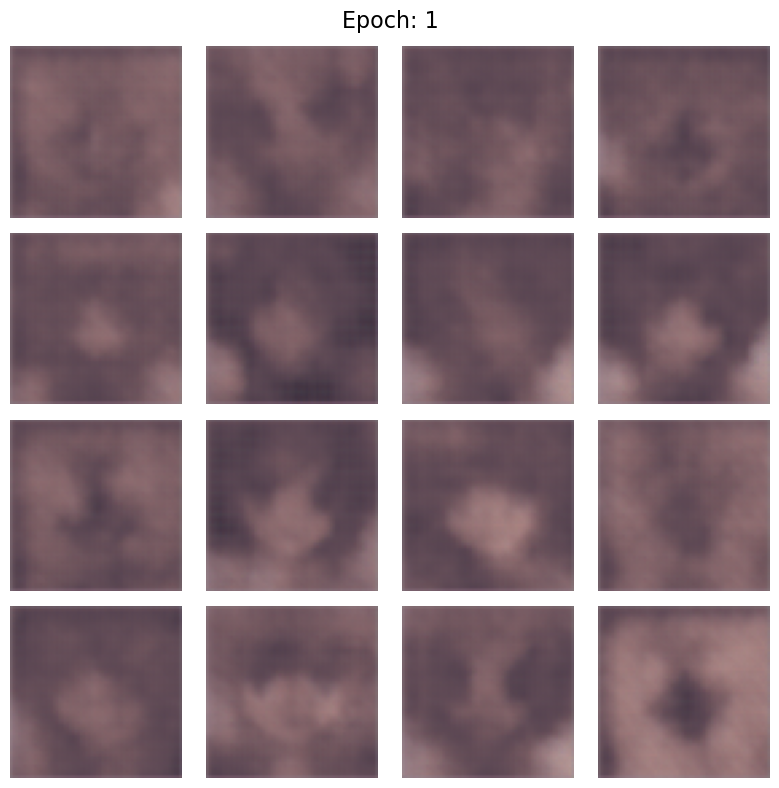

216/216 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - kl_loss: 1.6789 - loss: 2514.4587 - reconstruction_loss: 2512.7795 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 2/10
215/216 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - kl_loss: 2.2328 - loss: 2264.2930 - reconstruction_loss: 2262.0601 

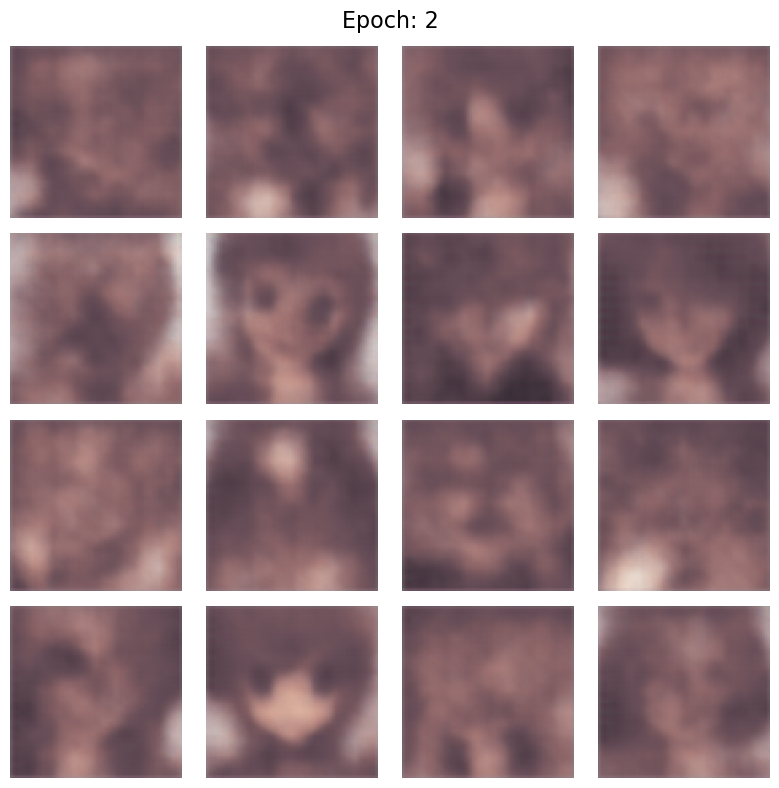

216/216 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - kl_loss: 2.2340 - loss: 2264.0972 - reconstruction_loss: 2261.8628 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 3/10
215/216 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - kl_loss: 2.5975 - loss: 2193.4829 - reconstruction_loss: 2190.8853 

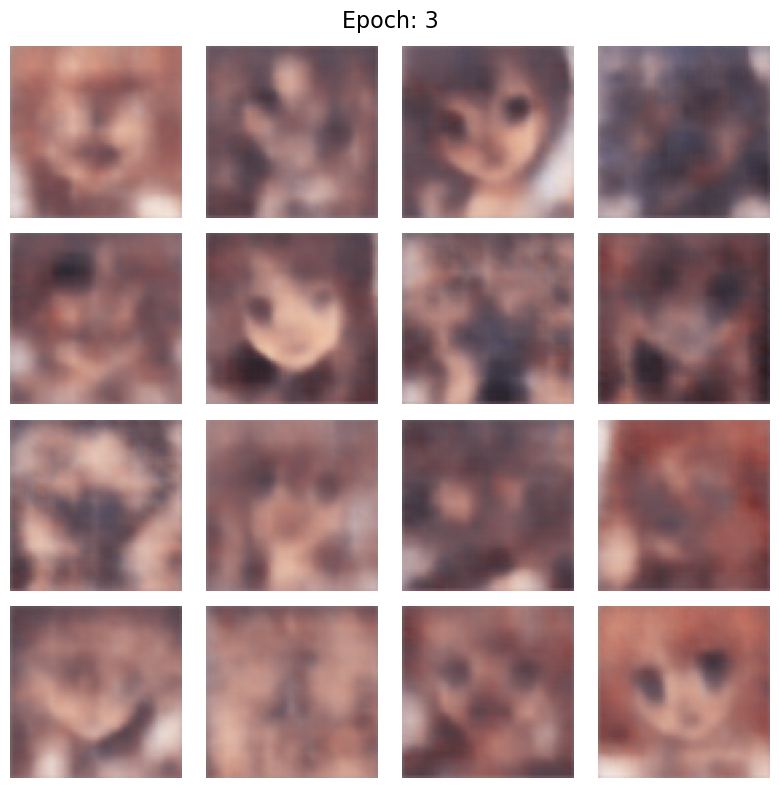

216/216 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - kl_loss: 2.5983 - loss: 2193.3594 - reconstruction_loss: 2190.7607 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 4/10
215/216 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - kl_loss: 2.8164 - loss: 2148.5820 - reconstruction_loss: 2145.7656 

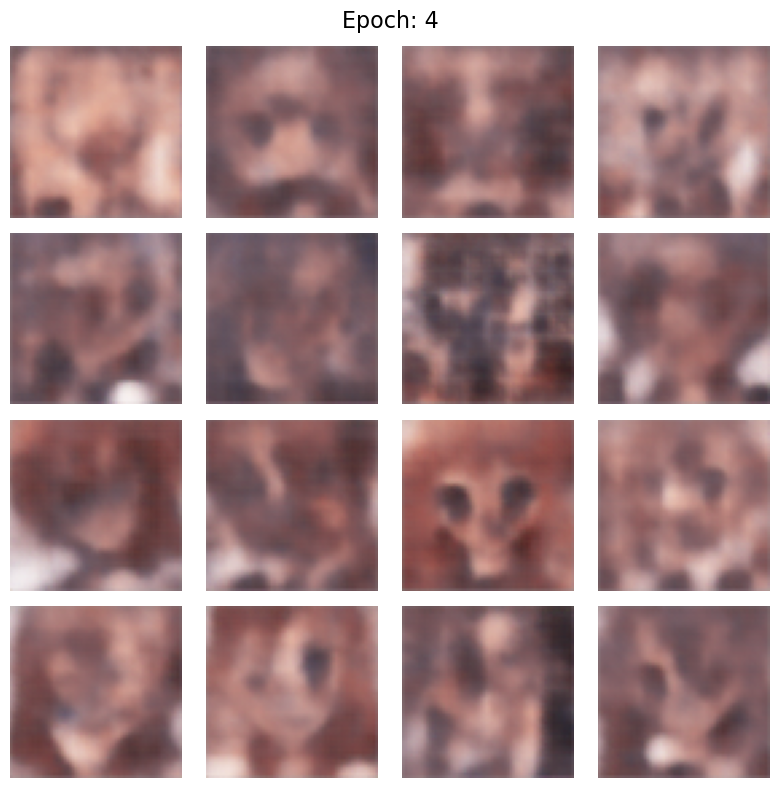

216/216 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - kl_loss: 2.8168 - loss: 2148.5452 - reconstruction_loss: 2145.7285 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 5/10
215/216 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - kl_loss: 2.8926 - loss: 2131.8545 - reconstruction_loss: 2128.9619 

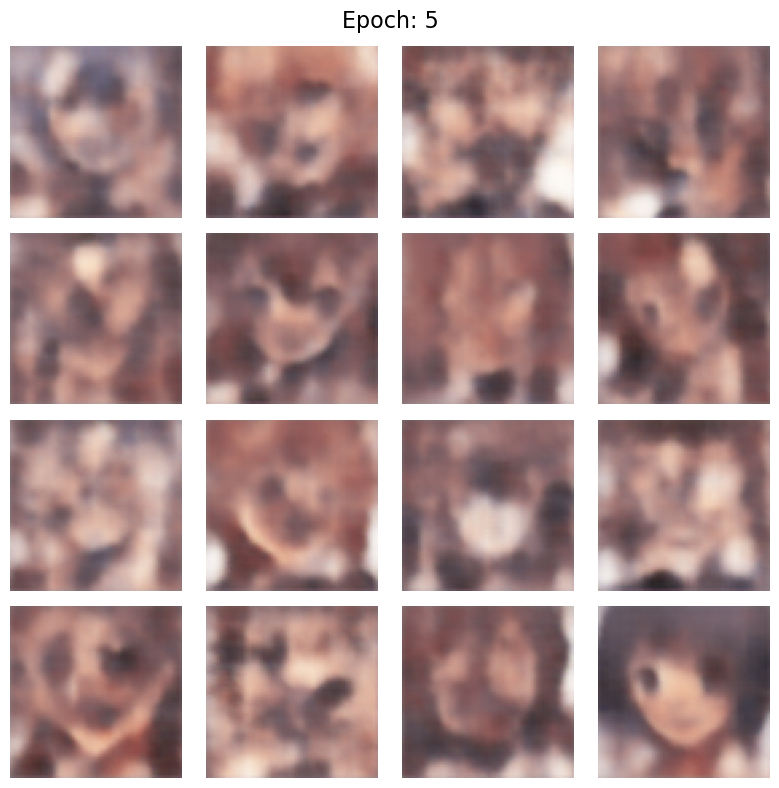

216/216 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - kl_loss: 2.8929 - loss: 2131.8025 - reconstruction_loss: 2128.9097 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 6/10
215/216 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - kl_loss: 2.9813 - loss: 2112.6731 - reconstruction_loss: 2109.6914 

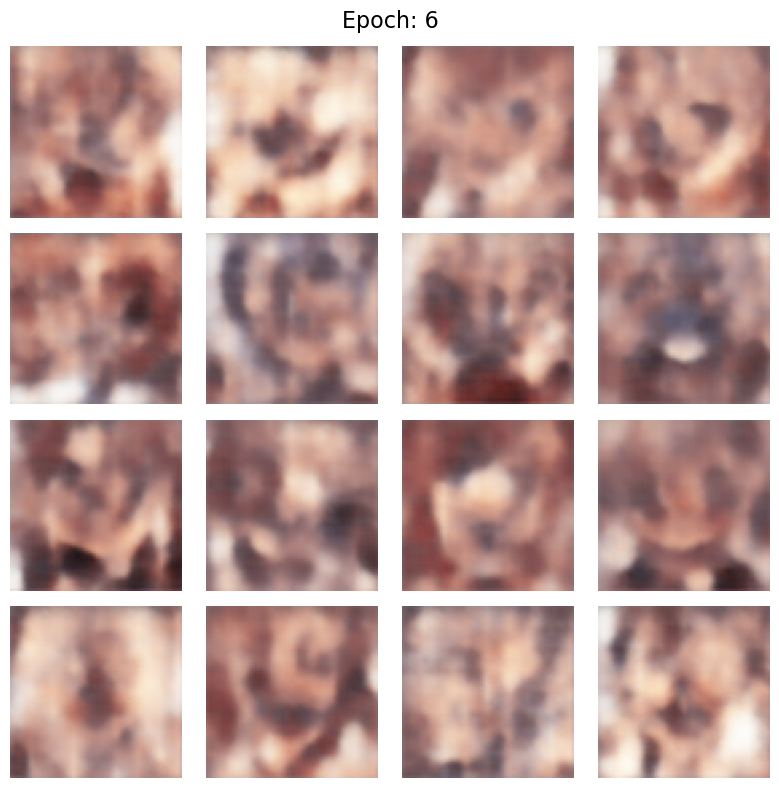

216/216 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - kl_loss: 2.9814 - loss: 2112.6455 - reconstruction_loss: 2109.6636 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 7/10
215/216 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - kl_loss: 3.0160 - loss: 2099.0188 - reconstruction_loss: 2096.0032 

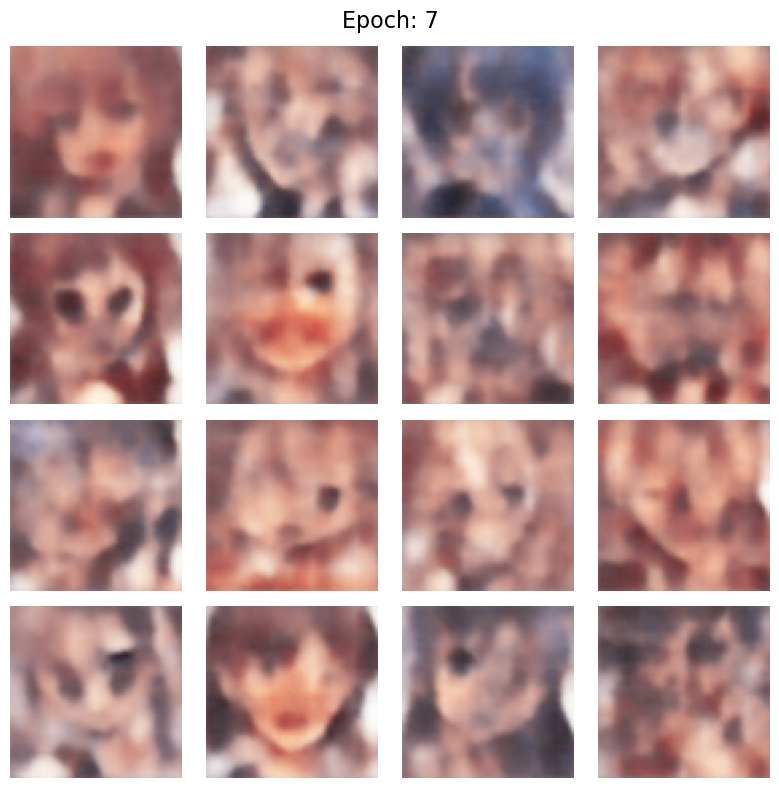

216/216 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - kl_loss: 3.0162 - loss: 2099.0066 - reconstruction_loss: 2095.9907 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 8/10
215/216 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - kl_loss: 3.0771 - loss: 2085.4639 - reconstruction_loss: 2082.3865 

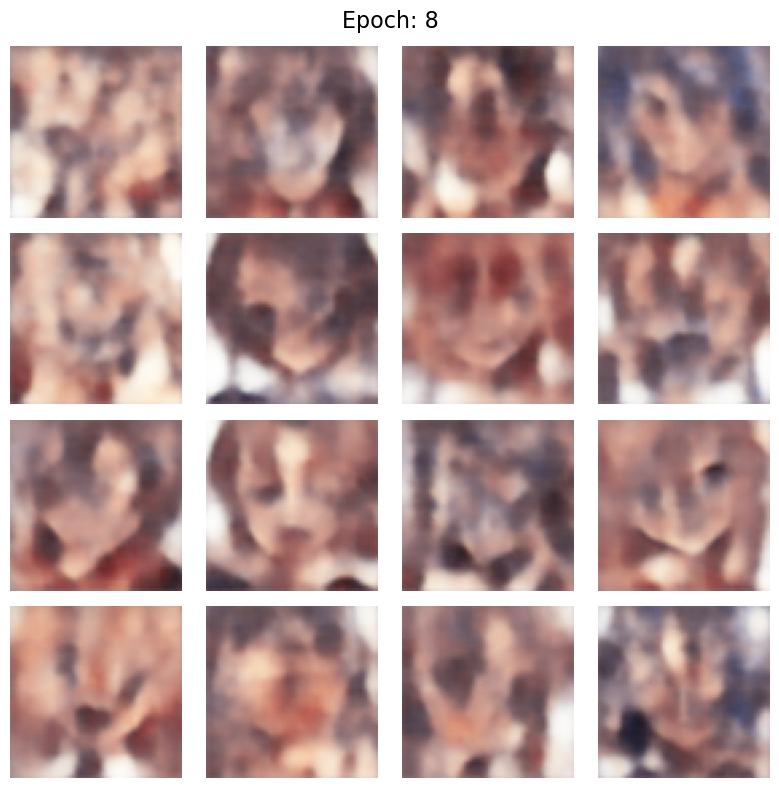

216/216 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - kl_loss: 3.0771 - loss: 2085.5007 - reconstruction_loss: 2082.4233 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 9/10
215/216 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - kl_loss: 3.0850 - loss: 2083.7725 - reconstruction_loss: 2080.6877 

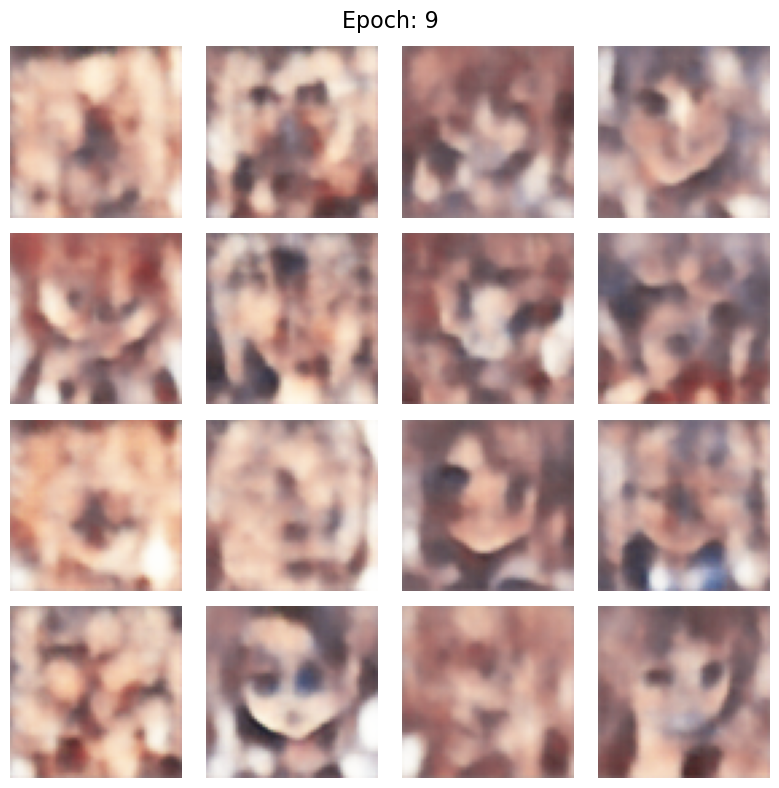

216/216 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - kl_loss: 3.0850 - loss: 2083.7761 - reconstruction_loss: 2080.6912 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 10/10
215/216 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - kl_loss: 3.1244 - loss: 2080.9075 - reconstruction_loss: 2077.7830 

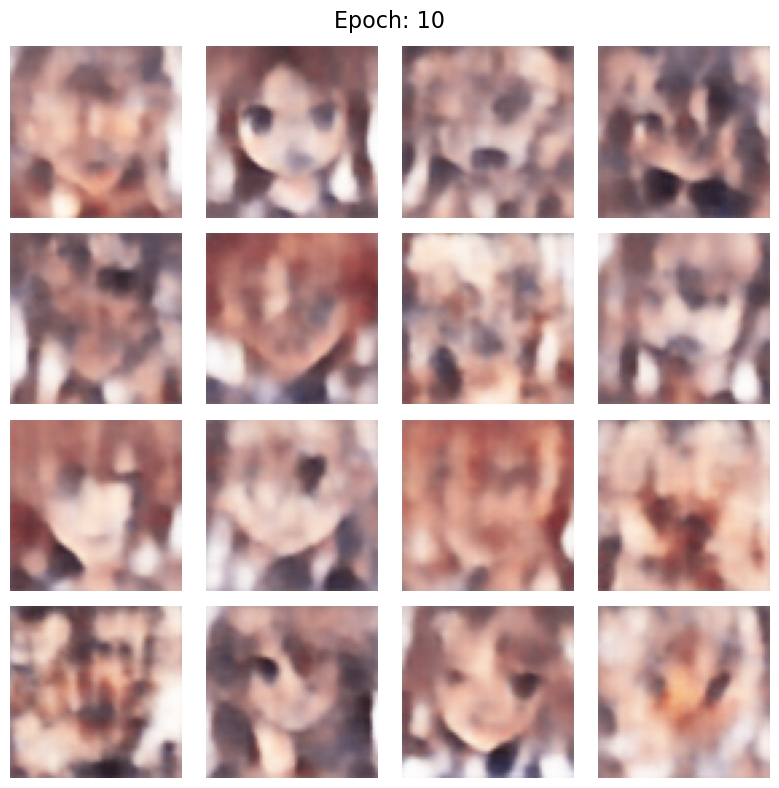

216/216 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - kl_loss: 3.1244 - loss: 2080.8655 - reconstruction_loss: 2077.7410 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00


In [8]:
# --- PART 1: DATA PIPELINE ---

# Define constants for the data
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32
# IMAGE_DIR = "/kaggle/input/animefacedataset/images"
IMAGE_DIR = "/Users/tomli/.cache/kagglehub/datasets/soumikrakshit/anime-faces/versions/1"

def get_image_paths(directory):
    """
    Returns a list of all image paths in a given directory,
    filtering for .jpg, .jpeg, and .png files.
    """
    image_paths = []
    # Check if the directory exists
    if not os.path.exists(directory):
        print(f"Error: Directory not found at {directory}")
        return image_paths 

    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')): 
                image_paths.append(os.path.join(root, file))
    return image_paths 

def preprocess_image(image_path):
    """
    Loads an image file, decodes it to 3 channels, resizes it,
    and normalizes pixel values to the [0, 1] range.
    """
    # Read the file from the path
    img = tf.io.read_file(image_path) 

    # Decode the image into a 3-channel tensor
    img = tf.io.decode_image(img, channels=3, expand_animations=False) 

    # Resize the image to the desired dimensions
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])

    # Normalize pixel values to be between 0 and 1
    img = img / 255.0

    return img

# 1. Get all image paths from the directory
all_image_paths = get_image_paths(IMAGE_DIR)

if all_image_paths:
    subset_fraction = 0.20
    all_image_paths = all_image_paths[:int(len(all_image_paths) * subset_fraction)]
    print(f"Using a subset of {len(all_image_paths)} images for faster training.")


# Main conditional block
if all_image_paths:
    print(f"Found {len(all_image_paths)} images.")

    # 2. Create a TensorFlow dataset from the paths
    path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

    # 3. Apply the preprocessing function to create the image dataset
    image_ds = path_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

    # 4. Split the dataset into training (80%) and validation (20%)
    dataset_size = len(all_image_paths)
    train_size = int(0.8 * dataset_size)

    image_ds = image_ds.shuffle(buffer_size=dataset_size, reshuffle_each_iteration=False)

    train_ds = image_ds.take(train_size)
    val_ds = image_ds.skip(train_size)

    # 5. Build the training data pipeline
    train_ds = train_ds.shuffle(buffer_size=train_size) 
    train_ds = train_ds.batch(BATCH_SIZE)
    # Prefetch will preload data (prepare the next batch of data while training) to improve GPU utilization
    train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE) 

    # 6. Build the validation data pipeline
    val_ds = val_ds.batch(BATCH_SIZE)
    val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

    train_batches = math.ceil(train_size / BATCH_SIZE)
    val_batches = math.ceil((dataset_size - train_size) / BATCH_SIZE)

    print(f"\n--- Dataset Setup Complete ---")
    print(f"Training dataset has {train_batches} batches.")
    print(f"Validation dataset has {val_batches} batches.")


    # --- PART 2: VARIATIONAL AUTOENCODER (VAE) ---

    LATENT_DIM = 128

    class Sampling(layers.Layer):
        """
        Custom sampling layer using the reparameterization trick (z = mu + sigma * epsilon).
        Also adds the KL divergence loss to the model.
        """
        def call(self, inputs):
            z_mean, z_log_var = inputs
            batch = tf.shape(z_mean)[0]
            dim = tf.shape(z_mean)[1]
            epsilon = tf.keras.backend.random_normal(shape=(batch, dim))

            # Reparameterization trick
            z = z_mean + tf.exp(0.5 * z_log_var) * epsilon

            # Calculate and add KL divergence loss
            kl_loss = -0.5 * tf.reduce_mean(
                z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1
            )
            self.add_loss(kl_loss) 

            return z

    # --- Build the Encoder ---
    encoder_inputs = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="relu")(x) 

    # Outputs for mean (mu) and log variance (sigma)
    z_mean = layers.Dense(LATENT_DIM, name="z_mean")(x)
    z_log_var = layers.Dense(LATENT_DIM, name="z_log_var")(x)

    # Use the custom sampling layer
    z = Sampling()([z_mean, z_log_var])

    encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
    print("\n--- Encoder Summary ---")
    encoder.summary()


    # --- Build the Decoder ---
    latent_inputs = layers.Input(shape=(LATENT_DIM,))
    x = layers.Dense(8 * 8 * 128, activation="relu")(latent_inputs)
    x = layers.Reshape((8, 8, 128))(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", strides=2, padding="same")(x)
    # now x shape is (16, 16, 128)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
    # now x shape is (32, 32, 64)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
    # now x shape is (64, 64, 32)
    x = layers.BatchNormalization()(x)
    decoder_outputs = layers.Conv2DTranspose(3, 3, activation="sigmoid", padding="same")(x)
    # now x shape is (64, 64, 3)

    decoder = tf.keras.Model(latent_inputs, decoder_outputs, name="decoder")
    print("\n--- Decoder Summary ---")
    decoder.summary()


    # --- Build the Full VAE Model ---
    class VAE(tf.keras.Model):
        def __init__(self, encoder, decoder, **kwargs):
            super(VAE, self).__init__(**kwargs)
            self.encoder = encoder
            self.decoder = decoder
            self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
            self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
            self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

        @property
        def metrics(self):
            return [
                self.total_loss_tracker,
                self.reconstruction_loss_tracker,
                self.kl_loss_tracker,
            ]

        def call(self, inputs):
            """Defines the forward pass for the VAE for inference."""
            _, _, z = self.encoder(inputs)
            reconstruction = self.decoder(z)
            return reconstruction

        def train_step(self, data):
            with tf.GradientTape() as tape:
                z_mean, z_log_var, z = self.encoder(data) 
                reconstruction = self.decoder(z)
                reconstruction_loss = tf.reduce_mean(
                    tf.reduce_sum(
                        tf.keras.losses.binary_crossentropy(data, reconstruction), 
                        axis=(1, 2), # sum loss over height and width
                    )
                )
                # self.encoder.losses is actually the kl_loss by self.add_loss(kl_loss)
                total_loss = reconstruction_loss + sum(self.encoder.losses)

            grads = tape.gradient(total_loss, self.trainable_weights) 
            self.optimizer.apply_gradients(zip(grads, self.trainable_weights)) 

            self.total_loss_tracker.update_state(total_loss) 
            self.reconstruction_loss_tracker.update_state(reconstruction_loss) 
            self.kl_loss_tracker.update_state(sum(self.encoder.losses)) 

            return {
                "loss": self.total_loss_tracker.result(),
                "reconstruction_loss": self.reconstruction_loss_tracker.result(),
                "kl_loss": self.kl_loss_tracker.result(),
            }


    # --- PART 3: TRAINING AND VISUALIZATION ---

    # Custom callback to generate and display sample images after each epoch
    class VAEMonitor(tf.keras.callbacks.Callback):
        def __init__(self, num_img=16, latent_dim=LATENT_DIM): 
            self.num_img = num_img
            self.latent_dim = latent_dim

        def on_epoch_end(self, epoch, logs=None):
            random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
            generated_images = self.model.decoder.predict(random_latent_vectors, verbose=0) 

            # Calculate grid size
            grid_size = int(np.sqrt(self.num_img))
            fig, axes = plt.subplots(grid_size, grid_size, figsize=(8, 8))
            fig.suptitle(f'Epoch: {epoch + 1}', fontsize=16)

            for i, ax in enumerate(axes.flatten()):
                ax.imshow(generated_images[i]) 
                ax.axis("off")

            plt.tight_layout()
            plt.show()

    # Instantiate the VAE
    vae = VAE(encoder, decoder) 

    # Compile the VAE with the Adam optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)
    vae.compile(optimizer=optimizer)

    print("\n--- Starting VAE Training ---")
    # Train the VAE with the custom callback
    history = vae.fit(
        train_ds, 
        epochs=10,
        validation_data=val_ds,
        callbacks=[VAEMonitor(num_img=16, latent_dim=LATENT_DIM)] 
    )

else:
    print("\nNo images found. Please check the IMAGE_DIR path")

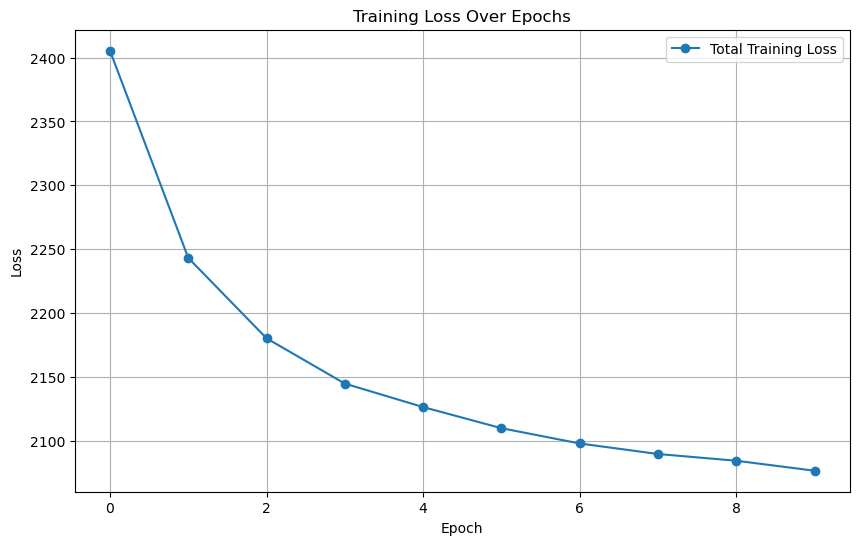

In [18]:
# --- Plot the average training loss over epochs ---

# The 'history' object is returned by the vae.fit() method 
# and contains the loss values for each epoch.
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'], label='Total Training Loss', marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


--- Evaluating Model and Visualizing Results ---


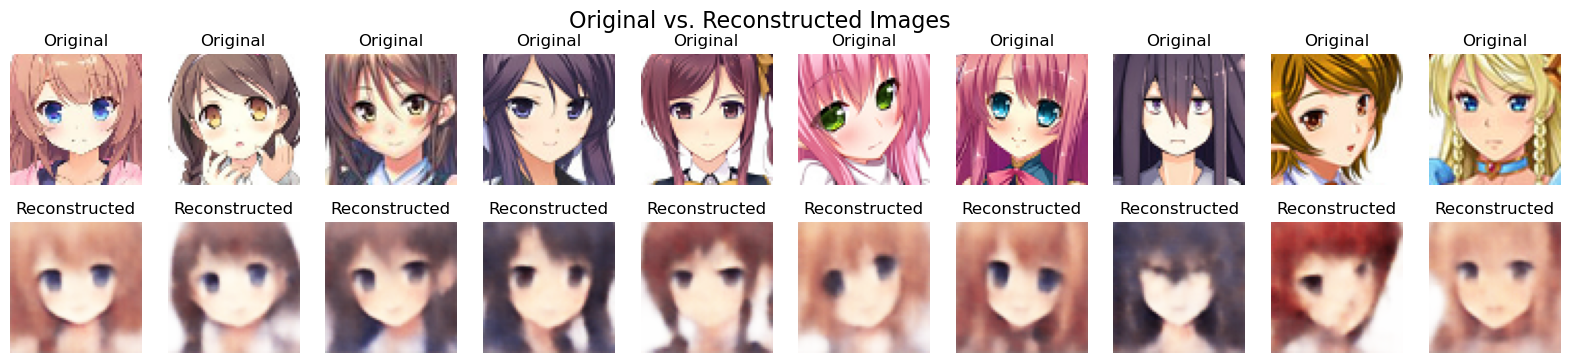

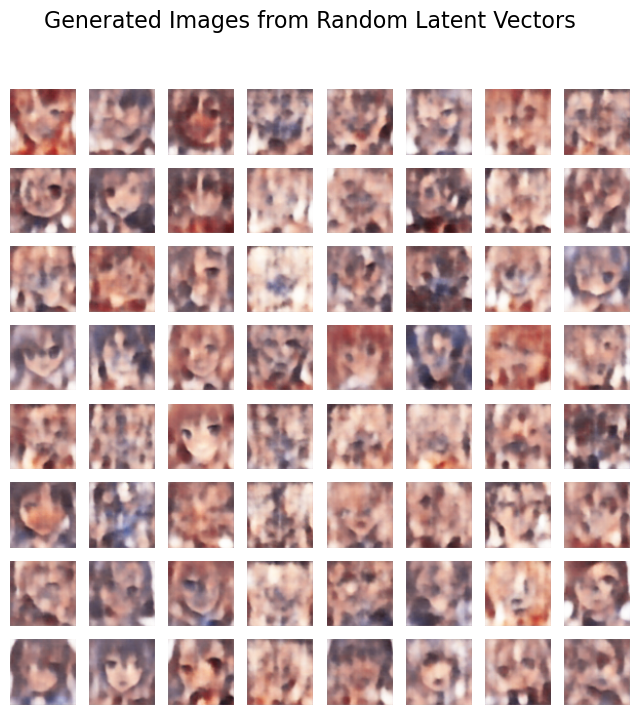

In [12]:
  # --- PART 4: EVALUATION AND ANALYSIS ---

  print("\n--- Evaluating Model and Visualizing Results ---")

  # 1. Visualize Reconstructed Images
  val_batch = next(iter(val_ds))
  reconstructions = vae.predict(val_batch, verbose=0)

  n = 10
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # Display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(val_batch[i]) 
      plt.title("Original")
      plt.axis("off")

      # Display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(reconstructions[i]) 
      plt.title("Reconstructed")
      plt.axis("off")
  plt.suptitle("Original vs. Reconstructed Images", fontsize=16)
  plt.show() 

  # 2. Generate and display new images
  num_new_images = 64
  random_vectors = tf.random.normal(shape=(num_new_images, LATENT_DIM))
  new_images = decoder.predict(random_vectors, verbose=0)

  plt.figure(figsize=(8, 8))
  for i in range(num_new_images):
      ax = plt.subplot(8, 8, i + 1)
      plt.imshow(new_images[i])
      plt.axis("off")
  plt.suptitle("Generated Images from Random Latent Vectors", fontsize=16)
  plt.show() 

In [14]:
# --- Compute Average Reconstruction Error on Validation Set ---

# Use a Keras metric to keep a running average of the loss
val_recon_error = tf.keras.metrics.Mean()

print("Calculating average reconstruction error over the validation set...")

# Iterate over every batch in the validation dataset
for batch in val_ds:
    # Get the model's reconstruction for the batch
    reconstruction = vae(batch, training=False) # Forward pass in inference mode
    
    # Calculate the reconstruction loss for the batch
    # This should match the loss calculation used during training
    recon_loss = tf.reduce_mean(
        tf.reduce_sum(
            tf.keras.losses.binary_crossentropy(batch, reconstruction), 
            axis=(1, 2)
        )
    )
    # Update the running average
    val_recon_error.update_state(recon_loss)

print(f"\nAverage Reconstruction Error on Validation Set: {val_recon_error.result():.4f}")

Calculating average reconstruction error over the validation set...

Average Reconstruction Error on Validation Set: 2088.0298


2025-07-23 09:00:27.300177: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
